## BOSTON HOUSING PRICE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('C:/Users/vijay/Desktop/krupa/GL/SLR/housing.csv',index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [4]:
df.shape

(506, 14)

In [5]:
df.size

7084

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Here we can see that mpst of the columns have mean greater then median. Hence there is a presnce of negative outliers.Which maked them slightly skewed. 

Age is slightly negative skewed.

In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

tax         AxesSubplot(0.125,0.657941;0.227941x0.222059)
age      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
black    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
medv        AxesSubplot(0.125,0.391471;0.227941x0.222059)
dtype: object

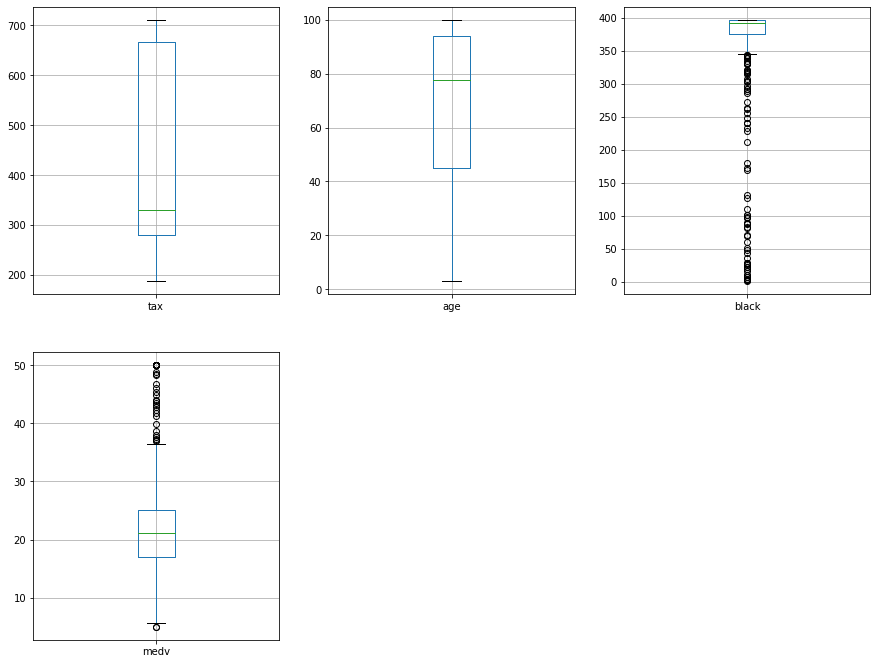

In [8]:
df[['tax','age','black','medv']].plot(kind='box',subplots=True,layout=(3,3),
                                         sharex=False,sharey=False,grid=True,figsize=(15,18))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001907DC379B0>,
      dtype=object)

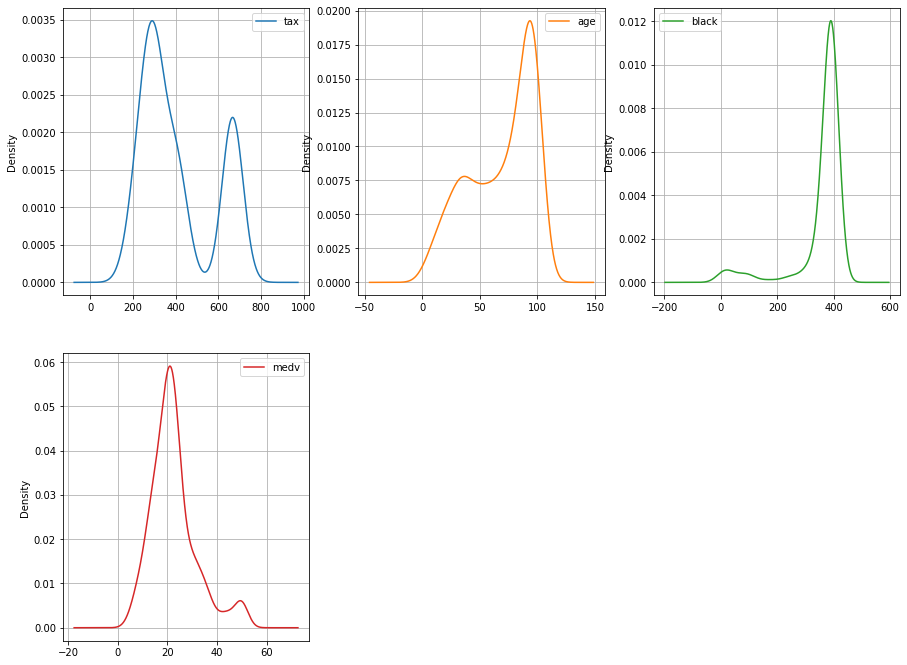

In [9]:
df[['tax','age','black','medv']].plot(kind='kde',subplots=True,layout=(3,3),sharex=False,sharey=False,grid=True,figsize=(15,18))

In [10]:
#sns.pairplot(df)

In [11]:
abs(df.corr()['medv']).sort_values()

chas       0.175260
dis        0.249929
black      0.333461
zn         0.360445
age        0.376955
rad        0.381626
crim       0.388305
nox        0.427321
tax        0.468536
indus      0.483725
ptratio    0.507787
rm         0.695360
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

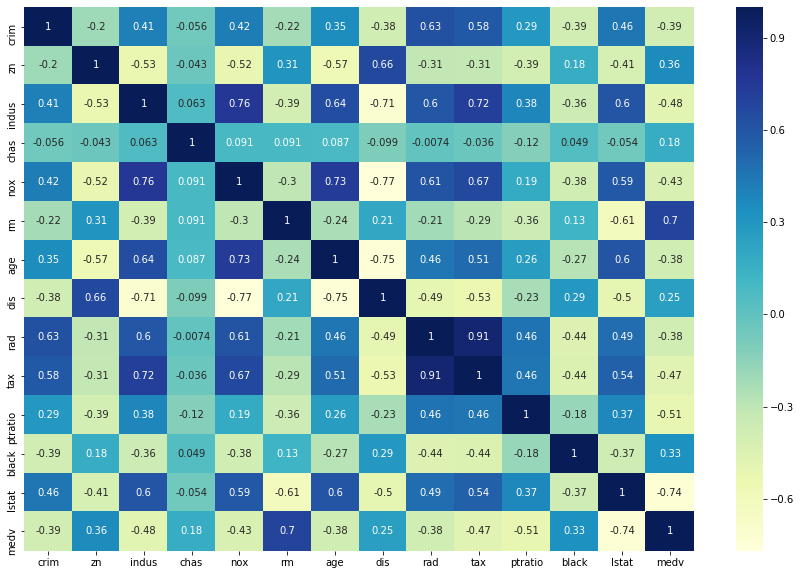

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [13]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [14]:
df['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [15]:
df['rad'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: rad, dtype: int64

In [16]:
x=df.drop('medv',axis=1)
y=df['medv']

In [17]:
LR=LinearRegression()
LR.fit(x,y)
print(f'Coefficients: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')
print(f'R^2 score: {LR.score(x, y)}')

Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept: 36.459488385090005
R^2 score: 0.7406426641094094


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(476, 13)
(30, 13)
(476,)
(30,)


In [19]:
LR=LinearRegression()
model=LR.fit(x_train,y_train)
print(f'R^2 score for train: {LR.score(x_train, y_train)}')
print(f'R^2 score for test: {LR.score(x_test, y_test)}')

R^2 score for train: 0.7410721208614652
R^2 score for test: 0.7170463430870473


R_square fot test and train data are almost same. Hence, there is over fitting

In [2]:
x=df.drop('medv',axis=1)
y=df['medv']
x_const=sm.add_constant(x)
LR=sm.OLS(y,x_const).fit()
LR.summary()

NameError: name 'df' is not defined

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


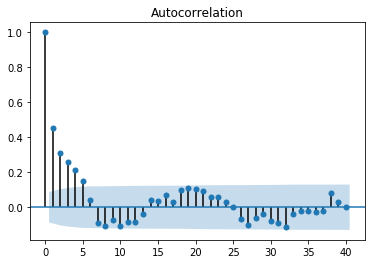

In [21]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(LR.resid, lags=40 , alpha=0.05)
acf.show()

In [22]:
from scipy import stats
print(stats.jarque_bera(LR.resid))

(783.1262780507668, 0.0)


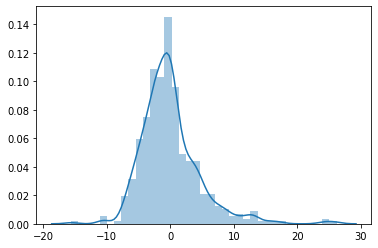

In [23]:
sns.distplot(LR.resid)

In [24]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=LR, frac=0.5)

(0.580850763961426, 0.999988852262534)

In [25]:
LR.resid.mean()

2.8186500125582235e-14

In [26]:
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(LR.resid, LR.model.exog)
print(name, test)

['F statistic', 'p-value'] (2.4311473253497424, 7.302071915609283e-12, 'increasing')


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
vif,1.792192,2.298758,3.991596,1.073995,4.39372,1.933744,3.100826,3.955945,7.484496,9.008554,1.799084,1.348521,2.941491


In [28]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [29]:
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, len(cols))
X_rfe = rfe.fit_transform(x,y)  

model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True  True  True False
  True]
[1 1 1 1 1 1 3 1 1 1 1 2 1]


In [30]:
nof_list=np.arange(1,13)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.663581


##### inference : Optimized num of feature is 10 and its accuracy is 66.35%

In [31]:
cols = list(x.columns)
model = LinearRegression()
rfe = RFE(model, 10)             
X_rfe = rfe.fit_transform(x,y)  

model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad', 'ptratio',
       'lstat'],
      dtype='object')


In [32]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

#### Optimized num of feature is 10 : ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'dis', 'rad', 'ptratio', 'lstat']

In [33]:
x_new=df.drop(['age','tax'],axis=1)
x_new.columns
x_new.head()

,crim,zn,indus,chas,nox,rm,dis,rad,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,18.7,396.90,5.33,36.2


In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y,test_size=0.3,random_state=0)

Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshol

In [35]:
from sklearn.linear_model import RidgeCV,LassoCV,Ridge,Lasso
lasso = LassoCV()
lasso.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(x,y))
coef = pd.Series(lasso.coef_, index = x.columns)

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


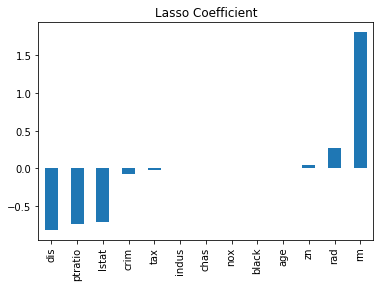

In [36]:
lasso_beta=pd.Series(lasso.coef_,x.columns).sort_values()
lasso_beta.plot(kind='bar',title='Lasso Coefficient')

In [37]:
reg = RidgeCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 0.100000
Best score using built-in LassoCV: 0.740600


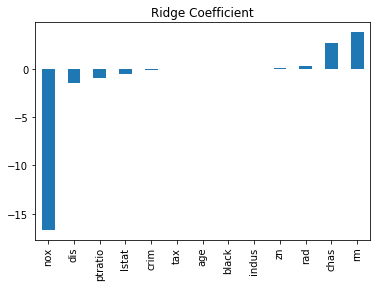

In [38]:
ridge_beta=pd.Series(reg.coef_,x.columns).sort_values()
ridge_beta.plot(kind='bar',title='Ridge Coefficient')

In [39]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
LR=LinearRegression()
Rd=Ridge(normalize=True)
La=Lasso(normalize=True)
En=ElasticNet(normalize=True) 

In [40]:
from sklearn.model_selection import GridSearchCV   
param_Rd={'alpha':np.arange(0.1,1,0.01)}
param_La={'alpha':np.arange(0.1,1,0.01)}
param_En={'alpha':np.arange(0.1,1,0.01),'l1_ratio':np.arange(0.1,1,0.01)}

In [41]:
GS_Rd=GridSearchCV(Rd,param_Rd,cv=5,scoring='r2')
GS_Rd.fit(x_new,y)
GS_Rd.best_params_

{'alpha': 0.1}

In [42]:
GS_La=GridSearchCV(La,param_La,cv=5,scoring='r2')
GS_La.fit(x_new,y)
GS_La.best_params_

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.1}

In [43]:
GS_En=GridSearchCV(En,param_En,cv=5,scoring='r2')
GS_En.fit(x_new,y)
GS_En.best_params_

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.1, 'l1_ratio': 0.9899999999999995}

In [44]:
LR=LinearRegression()
Rd=Ridge(normalize=True)
La=Lasso(normalize=True)
En=ElasticNet(l1_ratio=0.9899,normalize=True) 

In [45]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model, name in zip([LR,Rd,La,En],["Linear_Regression","Ridge","Lasso","ElasticNet"]):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):       
        xtrain,xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        ytrain,ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(xtrain,ytrain)
        y_predict=model.predict(xtest) 
        mse=metrics.mean_squared_error(ytest,y_predict) 
        rmse.append(np.sqrt(mse))
    print('RMSE scores: %0.03f(+/- %0.5f) [%s]' %(np.mean(rmse),np.std(rmse,ddof=1),name))

RMSE scores: 4.838(+/- 0.72906) [Linear_Regression]
RMSE scores: 5.599(+/- 0.87688) [Ridge]
RMSE scores: 9.171(+/- 0.77614) [Lasso]
RMSE scores: 9.171(+/- 0.77614) [ElasticNet]
